## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [4]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [8]:
len(fmnist_dataset_test)

10000

In [9]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [12]:
from tqdm.autonotebook import tqdm

class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(input_shape),
            nn.Dropout(0.41),
            nn.Linear(input_shape, num_classes),
            nn.LogSoftmax(-1)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [11]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─BatchNorm1d: 2-4                  [-1, 784]                 1,568
|    └─Dropout: 2-5                      [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 10]                  7,850
|    └─LogSoftmax: 2-7                   [-1, 10]                  --
Total params: 624,858
Trainable params: 624,858
Non-trainable params: 0
Total mult-adds (M): 1.25
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.38
Estimated Total Size (MB): 2.40


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─BatchNorm1d: 2-4                  [-1, 784]                 1,568
|    └─Dropout: 2-5                      [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 10]                  7,850
|    └─LogSoftmax: 2-7                   [-1, 10]                  --
Total params: 624,858
Trainable params: 624,858
Non-trainable params: 0
Total mult-adds (M): 1.25
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.38
Estimated Total Size (MB): 2.40

Your experiments come here:

In [13]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr = 1e-4)# YOUR CODE HERE
loss_func = nn.CrossEntropyLoss()# YOUR CODE HERE

num_epoch = 20
for epoch in range(num_epoch):
    curr = 0
    all = 0
    for x_batch, y_batch in tqdm(train_loader):
        model.train()
        mforw = model.forward(x_batch.to(device))
        loss = loss_func(mforw, y_batch.to(device))
        loss.backward()
        opt.step()
        opt.zero_grad()
        model.eval()
        curr += (mforw.argmax(-1) == y_batch.to(device)).sum()
        all += y_batch.shape[0]
    print (curr / all)
# Your experiments, training and validation loops here

  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8096)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8591)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8718)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8775)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8842)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8878)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8917)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8936)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8977)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.8988)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9017)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9055)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9053)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9067)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9092)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9089)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9098)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9133)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9140)


  0%|          | 0/469 [00:00<?, ?it/s]

tensor(0.9154)


In [14]:
curr = 0
all = 0
for x_batch, y_batch in test_loader:
    model.eval()
    mforw = model.forward(x_batch.to(device))
    curr += (mforw.argmax(-1) == y_batch.to(device)).sum()
    all += y_batch.shape[0]
print (curr / all)

tensor(0.8888)


### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [15]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, num_classes),
            nn.LogSoftmax(-1),
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [16]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─Linear: 2-4                       [-1, 784]                 615,440
|    └─ReLU: 2-5                         [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 10]                  7,850
|    └─LogSoftmax: 2-7                   [-1, 10]                  --
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
Total mult-adds (M): 2.47
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 4.73
Estimated Total Size (MB): 4.74


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─Linear: 2-4                       [-1, 784]                 615,440
|    └─ReLU: 2-5                         [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 10]                  7,850
|    └─LogSoftmax: 2-7                   [-1, 10]                  --
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
Total mult-adds (M): 2.47
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 4.73
Estimated Total Size (MB): 4.74

In [17]:
import torch.utils.data as data_utils
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr = 1e-4) # YOUR CODE HERE
loss_func = nn.CrossEntropyLoss() # YOUR CODE HERE
train_fmnist_red = data_utils.Subset(fmnist_dataset_train, torch.arange(10000))
loader_train_red = torch.utils.data.DataLoader(train_fmnist_red, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)


acc_test = []
acc_train = []
loss_test = []
loss_train = []
for epoch in tqdm(range(50)):
    all_train = 0
    train_loss = 0
    curr_train = 0
    for x_batch, y_batch in loader_train_red:
        model.train()
        mforw = model.forward(x_batch.to(device))
        loss = loss_func(mforw, y_batch.to(device))
        train_loss += loss.item()
        loss.backward()
        opt.step()
        opt.zero_grad()
        model.eval()
        curr += (mforw.argmax(-1) == y_batch.to(device)).sum()
        all += y_batch.shape[0]
        curr_loss_train = train_loss / len(loader_train_red)
    acc_train.append(curr / all)
    loss_train.append(curr_loss_train)
    
    

    curr_test = 0
    test_loss = 0
    all_test = 0
    for x_batch, y_batch in test_loader:
        model.eval()
        mforw = model.forward(x_batch.to(device))
        loss = loss_func(mforw, y_batch.to(device))
        test_loss += loss.item()
        curr_test += (mforw.argmax(-1) == y_batch.to(device)).sum()
        all_test += y_batch.shape[0]
        curr_loss_test = test_loss / len(test_loader)
    acc_test.append(curr_test / all_test)
    loss_test.append(curr_loss_test)

# Your experiments, come here

  0%|          | 0/50 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


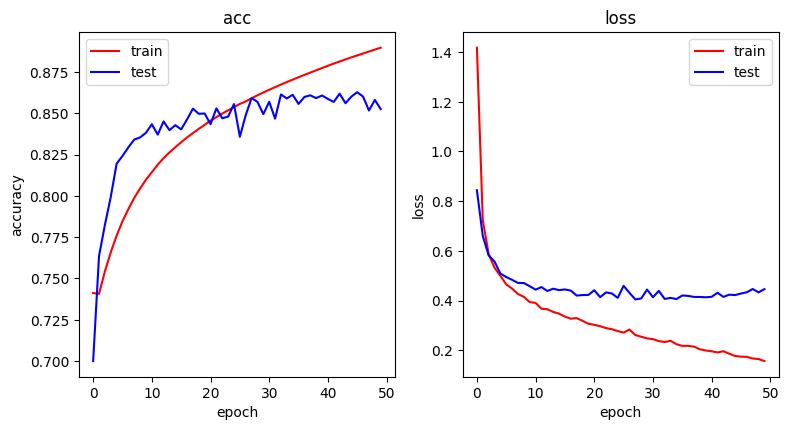

In [18]:
num_epochs = 50
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2, 2, 1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
x = np.array(range(0, num_epochs, 1))
y = list(map(lambda x: x.cpu().numpy(), acc_train))
plt.plot(x, y, 'r', label='train')
y = list(map(lambda x: x.cpu().numpy(), acc_test))
plt.plot(x, y, 'b', label='test')
plt.title('acc')
plt.legend()


plt.subplot(2, 2, 2)
plt.xlabel('epoch')
plt.ylabel('loss')
x = np.array(range(0, num_epochs, 1))
y = loss_train
plt.plot(x, y, 'r', label='train')
y = loss_test
plt.plot(x, y, 'b', label='test')
plt.title('loss')
plt.legend()
plt.show()

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [19]:
from torch.nn.modules.dropout import Dropout
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(input_shape),
            nn.Dropout(0.75),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.BatchNorm1d(input_shape),
            nn.Dropout(0.85),
            nn.Linear(input_shape, num_classes),
            nn.LogSoftmax(-1),
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [20]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─BatchNorm1d: 2-4                  [-1, 784]                 1,568
|    └─Dropout: 2-5                      [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 784]                 615,440
|    └─ReLU: 2-7                         [-1, 784]                 --
|    └─BatchNorm1d: 2-8                  [-1, 784]                 1,568
|    └─Dropout: 2-9                      [-1, 784]                 --
|    └─Linear: 2-10                      [-1, 10]                  7,850
|    └─LogSoftmax: 2-11                  [-1, 10]                  --
Total params: 1,241,866
Trainable params: 1,241,866
Non-trainable 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─BatchNorm1d: 2-4                  [-1, 784]                 1,568
|    └─Dropout: 2-5                      [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 784]                 615,440
|    └─ReLU: 2-7                         [-1, 784]                 --
|    └─BatchNorm1d: 2-8                  [-1, 784]                 1,568
|    └─Dropout: 2-9                      [-1, 784]                 --
|    └─Linear: 2-10                      [-1, 10]                  7,850
|    └─LogSoftmax: 2-11                  [-1, 10]                  --
Total params: 1,241,866
Trainable params: 1,241,866
Non-trainable 

In [21]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr = 1e-4) # YOUR CODE HERE
loss_func = nn.CrossEntropyLoss() # YOUR CODE HERE
train_fmnist_red = data_utils.Subset(fmnist_dataset_train, torch.arange(10000))
loader_train_red = torch.utils.data.DataLoader(train_fmnist_red, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)


acc_test = []
acc_train = []
loss_test = []
loss_train = []
for epoch in tqdm(range(50)):
    all_train = 0
    train_loss = 0
    curr_train = 0
    for x_batch, y_batch in loader_train_red:
        model.train()
        mforw = model.forward(x_batch.to(device))
        loss = loss_func(mforw, y_batch.to(device))
        train_loss += loss.item()
        loss.backward()
        opt.step()
        opt.zero_grad()
        model.eval()
        curr += (mforw.argmax(-1) == y_batch.to(device)).sum()
        all += y_batch.shape[0]
        curr_loss_train = train_loss / len(loader_train_red)
    acc_train.append(curr / all)
    loss_train.append(curr_loss_train)
    
    

    curr_test = 0
    test_loss = 0
    all_test = 0
    for x_batch, y_batch in test_loader:
        model.eval()
        mforw = model.forward(x_batch.to(device))
        loss = loss_func(mforw, y_batch.to(device))
        test_loss += loss.item()
        curr_test += (mforw.argmax(-1) == y_batch.to(device)).sum()
        all_test += y_batch.shape[0]
        curr_loss_test = test_loss / len(test_loader)
    acc_test.append(curr_test / all_test)
    loss_test.append(curr_loss_test)
    

  0%|          | 0/50 [00:00<?, ?it/s]

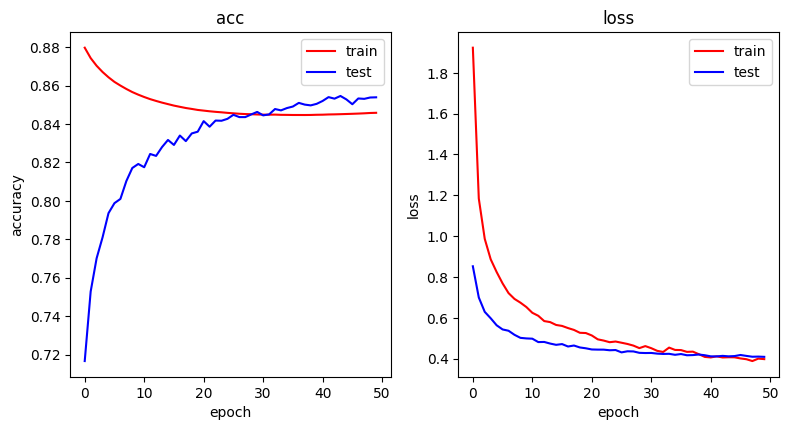

In [22]:
num_epochs = 50
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2, 2, 1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
x = np.array(range(0, num_epochs, 1))
y = list(map(lambda x: x.cpu().numpy(), acc_train))
plt.plot(x, y, 'r', label='train')
y = list(map(lambda x: x.cpu().numpy(), acc_test))
plt.plot(x, y, 'b', label='test')
plt.title('acc')
plt.legend()



plt.subplot(2, 2, 2)
plt.xlabel('epoch')
plt.ylabel('loss')
x = np.array(range(0, num_epochs, 1))
y = loss_train
plt.plot(x, y, 'r', label='train')
y = loss_test
plt.plot(x, y, 'b', label='test')
plt.title('loss')
plt.legend()
plt.show()

### Conclusions:

В Task2, анализируя графики, мы можем заметить, что с увеличением количества эпох, в какой-то момент loss на teste выходит на плато, но loss на train продолжает уменьшаться, так происходит переобучение. Чтобы избавиться от него мы используем  nn.BatchNorm1d и nn.Dropout и если мы проанализируем график loss в Task3, мы можем заметить, что эти методы помогают нам избавиться от переобучения и loss на train в какой-то момент тоже выходит на плато и совпадает с loss на test